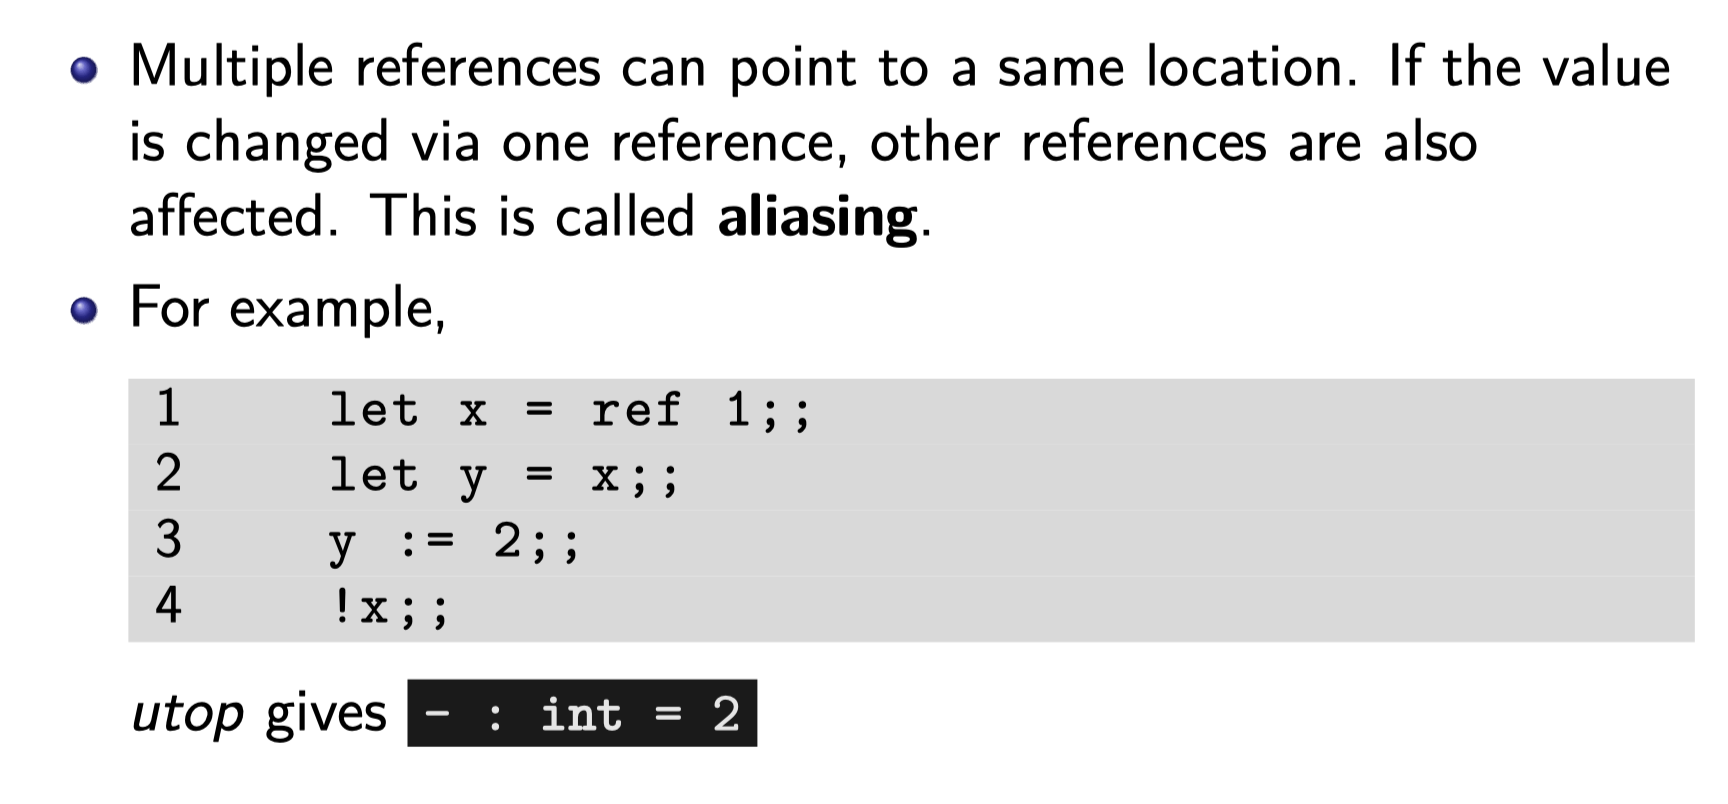

In [5]:
let x = ref 1;; 
let y = x;; 
y := 2;; 
!x;;
2;;

val x : int ref = {contents = 1}


val y : int ref = {contents = 1}


- : unit = ()


- : int = 2


- : int = 2


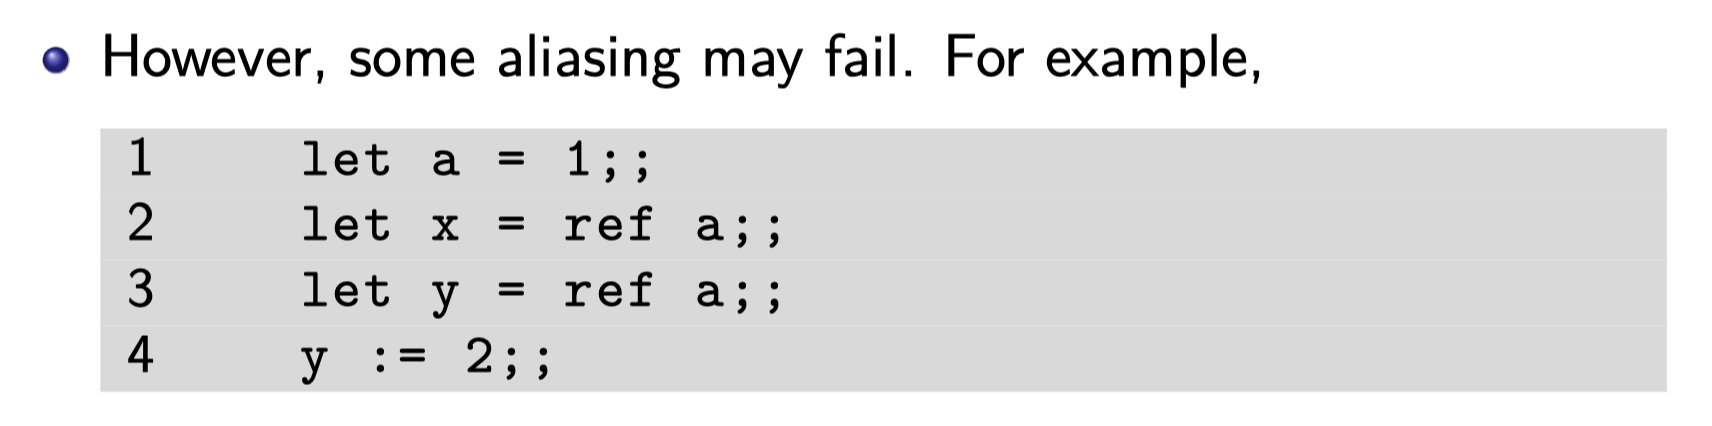

In [9]:
let a = 1;; 
let x = ref a;; 
let y = ref a;; 
y := 2;;
!x==a

val a : int = 1


val x : int ref = {contents = 1}


val y : int ref = {contents = 1}


- : unit = ()


- : bool = true


## Conuter

In [3]:
let counter = ref 0;;
let count = fun() ->
  counter := !counter +1;
  ! counter ;;

count ();;
count ();;
count ();;
count ();;

val counter : int ref = {contents = 0}


val count : unit -> int = <fun>


- : int = 1


- : int = 2


- : int = 3


- : int = 4


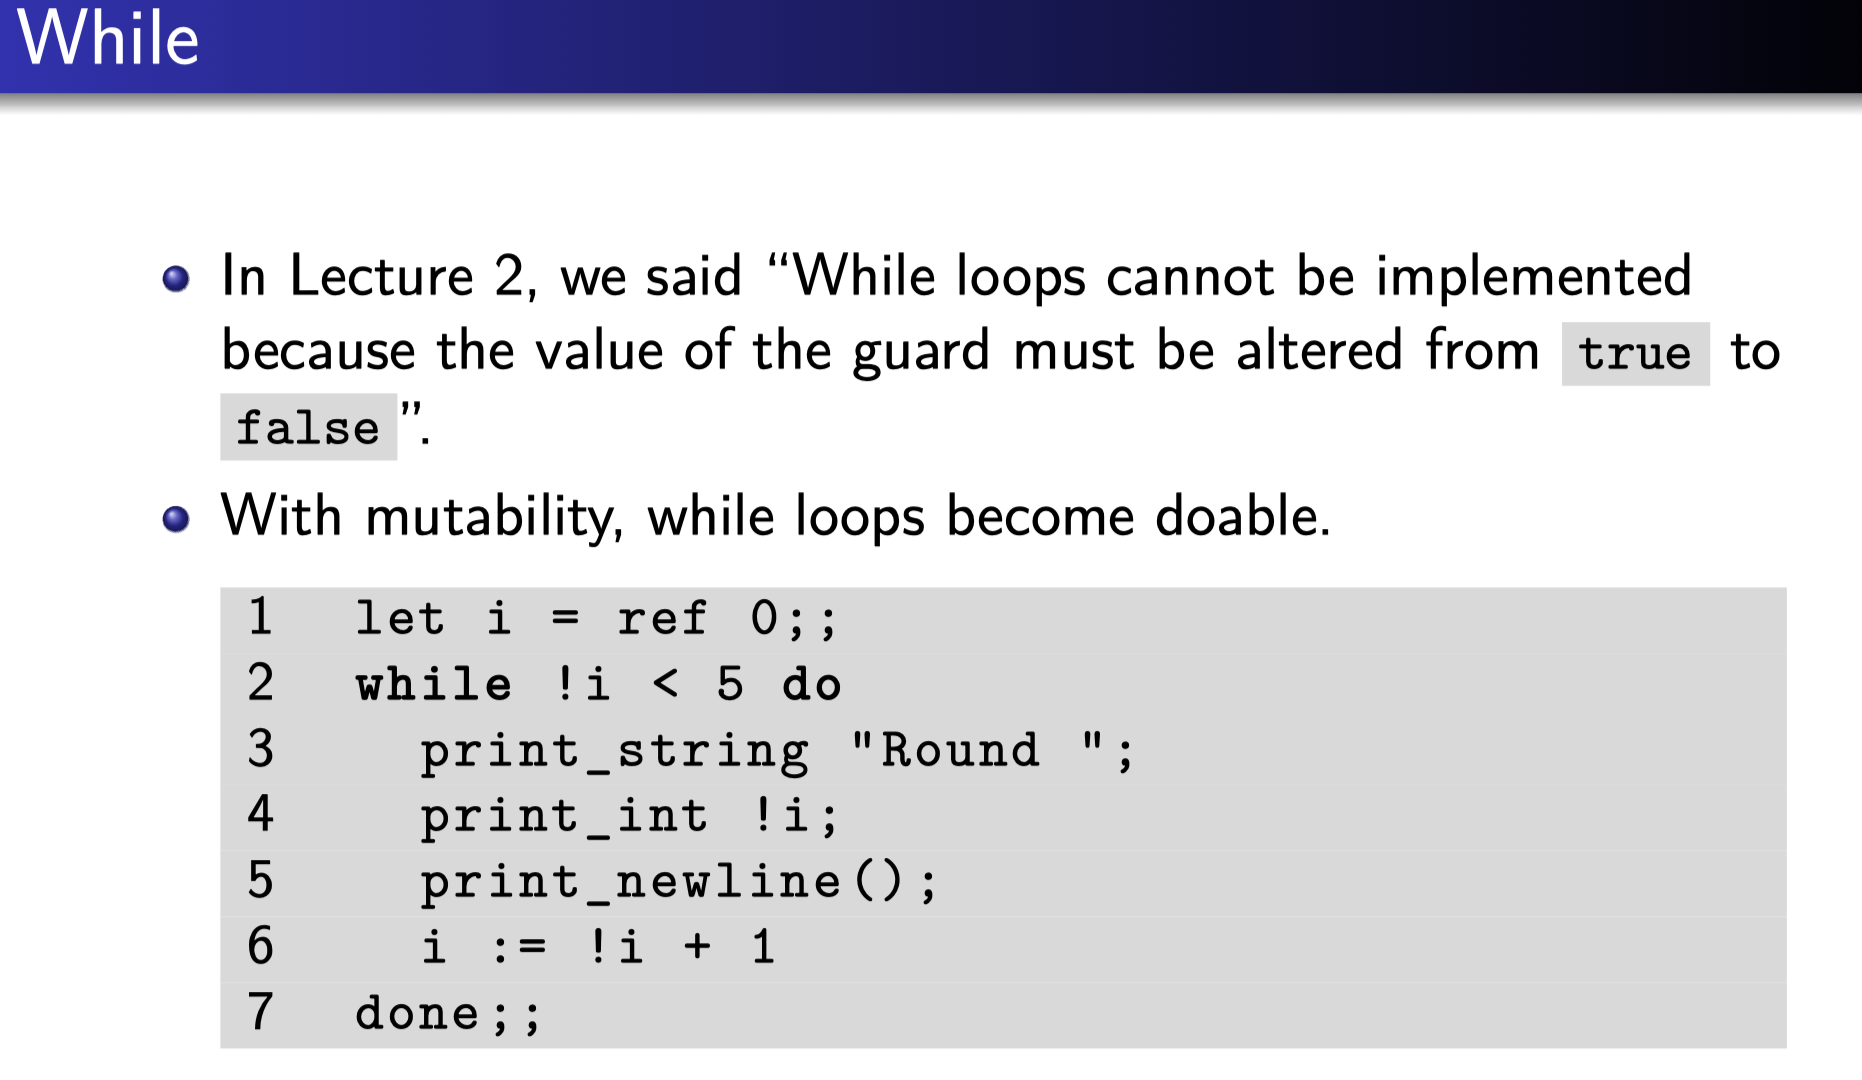

In [25]:
(* let i = ref 0;; 
while !i < 5 do 
  print_string " Round " ; 
  print_int !i; 
  print_newline(); 
  i := !i + 1 
done;; *)

let i = ref 0;;

while !i <5 do 
  print_string "Round ";
  print_int !i;
  print_newline();
  i:=!i+1;
done;;

val i : int ref = {contents = 0}


- : unit = ()


Round 0
Round 1
Round 2
Round 3
Round 4


In [13]:
type 'a pointer = 'a ref option;; let malloc x = Some (ref x);; exception Segfault;; let deref x = match x with | None -> raise Segfault | Some r -> !r;; let assign p v = match p with | None -> raise Segfault | Some r -> r := v;;
type 'a node = { value : 'a; next : 'a pointer };;
type 'a lkl = 'a node pointer;;

type 'a pointer = 'a ref option


val malloc : 'a -> 'a ref option = <fun>


exception Segfault


val deref : 'a ref option -> 'a = <fun>


val assign : 'a ref option -> 'a -> unit = <fun>


type 'a node = { value : 'a; next : 'a pointer; }


type 'a lkl = 'a node pointer


## Recursion

In [28]:
let dummy = ref (fun x -> x);;
let fact n = 
  if n =0 then 1
  else n* !dummy(n-1);;

dummy := fact;;

fact 5;;

val dummy : ('_weak3 -> '_weak3) ref = {contents = <fun>}


val fact : int -> int = <fun>


- : unit = ()


- : int = 120


In fact, how dummy implementated initially is not essential. Its value (declaration) will be mutated eventually.
Type of dummy is the only thing matters.
As long as its type does cause any type error in `fact`, which should be int -> int, the implementation is fine.

In [ ]:
However, utop says `dummy` is of type `'_weak1->'_weak1`

dummy is a non-polymorphic function but its type is currently unknown;
id is a polymorphic function but its type is known.

Once dummy interacts with some other functions in a context and '_weak1 is restricted to a specific type, it cannot be other types.

In [ ]:
let dummy = ref (fun x -> x);;
let plus a b = !dummy a + !dummy b;;
(* let concat a b =!dummy a ^ !dummy b;; *)
(* Once dummy type is set, it can not be changed *)


val dummy : ('_weak4 -> '_weak4) ref = {contents = <fun>}


val plus : int -> int -> int = <fun>


## Link List

In [2]:
type 'a pointer = 'a ref option;; 
let malloc x = Some (ref x);; (*change something to pointer*)

exception Segfault;; 

let deref x = 
    match x with 
    | None -> raise Segfault 
    | Some r -> !r;; 

let assign p v = (*change pointer content*)
    match p with 
    | None -> raise Segfault 
    | Some r -> r := v;;

type 'a node = {
  value: 'a ;
  next: 'a node pointer  
};;

type 'a lkl = 'a node pointer;;

let n1 = {value=1; next= None};;
let n2 = {value=2; next = malloc n1};;
let n3 = {value=3; next = malloc n2};;

let lst1:'a lkl = malloc n3;; (*n3 is a node link list is a node pointer, so we need to change node to node pointer*)

type 'a pointer = 'a ref option


val malloc : 'a -> 'a ref option = <fun>


exception Segfault


val deref : 'a ref option -> 'a = <fun>


val assign : 'a ref option -> 'a -> unit = <fun>


type 'a node = { value : 'a; next : 'a node pointer; }


type 'a lkl = 'a node pointer


val n1 : int node = {value = 1; next = None}


val n2 : int node =
  {value = 2; next = Some {contents = {value = 1; next = None}}}


val n3 : int node =
  {value = 3;
   next =
    Some
     {contents =
       {value = 2; next = Some {contents = {value = 1; next = None}}}}}


val lst1 : int lkl =
  Some
   {contents =
     {value = 3;
      next =
       Some
        {contents =
          {value = 2; next = Some {contents = {value = 1; next = None}}}}}}


In [3]:
let rec lkl_to_lst = function
  | None -> []
  | Some n -> !n.value::lkl_to_lst !n.next;;

lkl_to_lst lst1;;

assign lst1 n2;;

lkl_to_lst lst1;;


val lkl_to_lst : 'a node pointer -> 'a list = <fun>


- : int list = [3; 2; 1]


- : unit = ()


- : int list = [2; 1]


## Mutable Fields
To mutate a value in a record can be implemented in the same way.
For example, 2D coordinates can be

In [4]:
type point1 = {
  name: string ref;
  x :int ;
  y :int
};;

let p1 ={name = ref "(0,0)"; x= 0;y=0};;
p1.name := "Zero";;
p1;;

type point1 = { name : string ref; x : int; y : int; }


val p1 : point1 = {name = {contents = "(0,0)"}; x = 0; y = 0}


- : unit = ()


- : point1 = {name = {contents = "Zero"}; x = 0; y = 0}


Another way of implementing a mutable field in a record is by mutable

In [5]:
type point2 ={
   mutable name : string;
   x :int ;
   y :int
};;
let p2 ={name="(1,1)";x=1;y=1};;
p2.name <- "One";;
p2;;

type point2 = { mutable name : string; x : int; y : int; }


val p2 : point2 = {name = "(1,1)"; x = 1; y = 1}


- : unit = ()


- : point2 = {name = "One"; x = 1; y = 1}


In [6]:
let x = ref 1;;
(* contents = 1 indicates that x is a record with one field contents. *)

val x : int ref = {contents = 1}


- `ref` is a constructor of options.
- It is also a function of tyoe `'a -> 'a ref`. Applying the function ref 1;; will give you  
    - `- : int ref = {contents = 1}`

In [7]:
ref 1;;

- : int ref = {contents = 1}


- Previously, we have defined a linked list of three elements.
- Adding a new element to its head is easily accomplished.
- But, adding a new element to its tail is nearly infeasible.
- `node.next` is defined as 'a node pointer , which is `'a node ref option`.
- The last node in a linked list is of `next = None`, which is immutable!
- If you try `assign`, it raise `Segfault`.
- Thus, we need to mutable linked list.

## Mutable Linked List

In [8]:
type 'a nodeM = {
  mutable value: 'a;
  mutable next: 'a nodeM pointer
};;

type 'a lklm = 'a nodeM pointer;;

let (m1: 'a nodeM) = {value=1; next=None};;
let (m2: 'a nodeM) = {value=2; next=None};;
let (m3: 'a nodeM) = {value=3; next=None};;

m1.next <- malloc m2;;
m1;;
m2.next <- malloc m3;;

m2;;

let lstm1 = malloc m1;;

lstm1;;


type 'a nodeM = { mutable value : 'a; mutable next : 'a nodeM pointer; }


type 'a lklm = 'a nodeM pointer


val m1 : int nodeM = {value = 1; next = None}


val m2 : int nodeM = {value = 2; next = None}


val m3 : int nodeM = {value = 3; next = None}


- : unit = ()


- : int nodeM =
{value = 1; next = Some {contents = {value = 2; next = None}}}


- : unit = ()


- : int nodeM =
{value = 2; next = Some {contents = {value = 3; next = None}}}


val lstm1 : int nodeM ref option =
  Some
   {contents =
     {value = 1;
      next =
       Some
        {contents =
          {value = 2; next = Some {contents = {value = 3; next = None}}}}}}


- : int nodeM ref option =
Some
 {contents =
   {value = 1;
    next =
     Some
      {contents =
        {value = 2; next = Some {contents = {value = 3; next = None}}}}}}


## Stack

- Let’s try to implement a stack by using `'a nodeM`
- A stack is “last in first out” data structure.
- If s is an 'a stack and v is of type 'a , then push s v pushes v to the top of s.
- Thus, push is of type `'a stack -> 'a -> unit`
- pop s removes the top element from s and returns the element as output.
  - If s is empty, raise an exception.
- Thus pop is of type `'a stack -> 'a`. And the modification of s is a side-effect.
- peek s returns the top element of s without removing it.
- And `'a stack` should be a record with a mutable field in type `'a nodeM pointer.`
  - It is a pointer to align with nodeM.Next.
  - If the field is immutable, an empty stack cannot be pushed.

In [21]:
type 'a pointer = 'a ref option;; 
let malloc x = Some (ref x);; (*change something to pointer*)

exception Segfault;; 

let deref x = 
    match x with 
    | None -> raise Segfault 
    | Some r -> !r;; 

let assign p v = (*change pointer content*)
    match p with 
    | None -> raise Segfault 
    | Some r -> r := v;;

type 'a nodeM = {
  mutable value: 'a;
  mutable next: 'a nodeM pointer
};;

type 'a stack = {mutable top:'a nodeM pointer}

let push (s: 'a stack) v =
  match s.top with
  | None -> s.top <- malloc{value=v;next=None}
  | Some n -> s.top <- malloc{value=v;next=s.top};;

exception EmptyStack;;

let pop s =
  match s.top with 
  |None -> raise EmptyStack
  |Some n -> s.top <- !n.next;
  !n.value;;

let peek s =
  match s.top with
  | None -> raise EmptyStack
  | Some n -> !n.value;;

let m1 : int nodeM = {value=1; next=None};;
let st : int stack = {top = malloc m1};;

st.top;;

(* let st:'a stack = {top: malloc m1} *)

type 'a pointer = 'a ref option


val malloc : 'a -> 'a ref option = <fun>


exception Segfault


val deref : 'a ref option -> 'a = <fun>


val assign : 'a ref option -> 'a -> unit = <fun>


type 'a nodeM = { mutable value : 'a; mutable next : 'a nodeM pointer; }


type 'a stack = { mutable top : 'a nodeM pointer; }


val push : 'a stack -> 'a -> unit = <fun>


exception EmptyStack


val pop : 'a stack -> 'a = <fun>


val peek : 'a stack -> 'a = <fun>


val m1 : int nodeM = {value = 1; next = None}


val st : int stack = {top = Some {contents = {value = 1; next = None}}}


- : int nodeM pointer = Some {contents = {value = 1; next = None}}


In fact, our implementation of 'a lklm cannot add any element to an empty list.

- For example, with n1 defined as 'a nodeM pointer `let lstm2 : 'a lklM = None;;`
- None of the following assignments work

In [ ]:
let (n1: 'a nodeM) = {value=1; next=None};;

let lstm2 : 'a lklm = None;;

assign lstm2 m1;;(* lstm2 is empty and assign raise the exception*)

lstm2 <- malloc m1;; (*lstm2 is nota mutable fielf of a record*)

lstm2:=m1;; (*lstm2 is not ref but ref option*)

val lstm2 : 'a lklm = None
